## EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# DFW data
df = pd.read_csv("../Data/DFW_Weather.csv")

# Checking missing values as % of column
percent_M = df.apply(lambda col: col.astype(str).str.contains('M', case=False).mean() * 100)

print(percent_M)

station                0.000000
valid                  0.000000
tmpf                   0.064329
dwpf                   0.064329
relh                   0.075051
drct                   1.881634
sknt                   0.080412
p01i                   1.232980
alti                   0.037525
mslp                  13.911225
vsby                   0.000000
gust                  82.422001
skyc1                  0.037525
skyc2                 51.115042
skyc3                 76.669883
skyc4                 94.569529
skyl1                 15.851828
skyl2                 51.115042
skyl3                 76.669883
skyl4                 94.569529
wxcodes               86.598049
ice_accretion_1hr     99.871341
ice_accretion_3hr     99.983918
ice_accretion_6hr     99.973196
peak_wind_gust        91.047497
peak_wind_drct        91.047497
peak_wind_time        91.047497
feel                   0.075051
metar                100.000000
snowdepth            100.000000
dtype: float64


In [31]:
# Removing metar and snowdepth due to no data
df.drop(columns=['metar', 'snowdepth'], inplace=True)
df.columns

Index(['station', 'valid', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i',
       'alti', 'mslp', 'vsby', 'gust', 'skyc1', 'skyc2', 'skyc3', 'skyc4',
       'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes', 'ice_accretion_1hr',
       'ice_accretion_3hr', 'ice_accretion_6hr', 'peak_wind_gust',
       'peak_wind_drct', 'peak_wind_time', 'feel'],
      dtype='object')

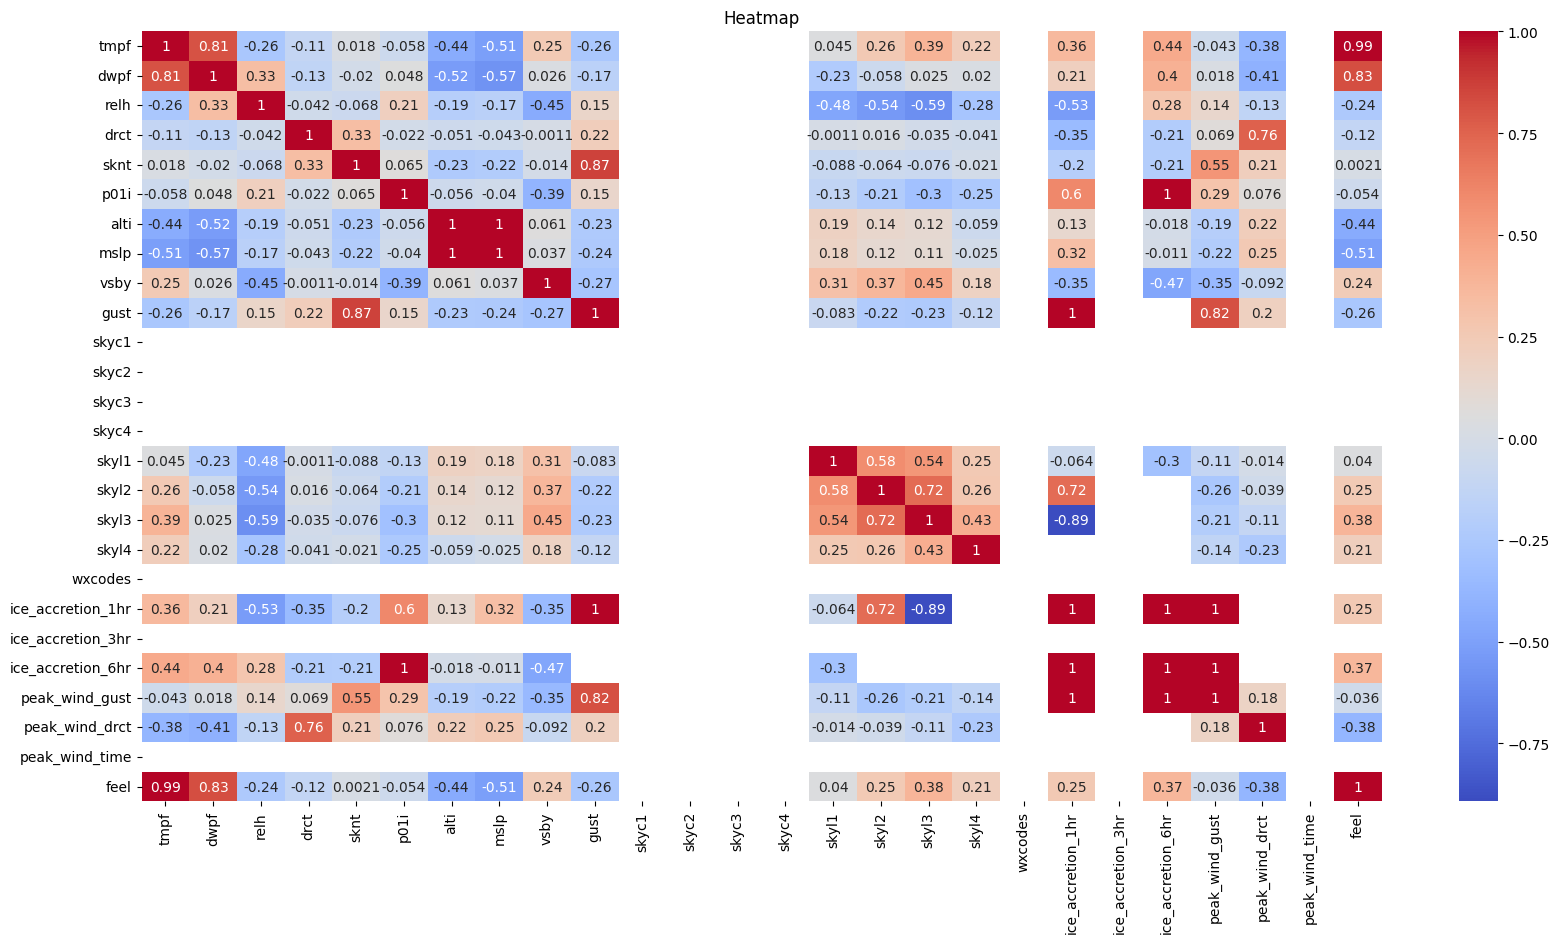

In [42]:
# Converting to numeric
exclude_cols = ['station', 'valid']
cols_to_convert = df.drop(columns=exclude_cols).columns
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
df.dtypes

# Heatmap
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize = (20, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title("Heatmap")
plt.show()
